# Objective Functions

* https://github.com/JohnLangford/vowpal_wabbit/wiki/Loss-functions

| Loss | Minimizer | Example |
|:-----|:----------|:--------|
| MSE, MAE, RMSLE  | Expectation (mean) | Regression (Expected return on stock) |
| Logistic, Entropy, KL-Divergence | Probability | Classification (Probability of click on ad) |
| Hinge | 0 ~ 1 approximation | Classification (Is the digit a 7?) |
| Poisson | Counts (Log Mean) | Regression (Number of call events to call center) |

In [1]:
%pylab inline
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import minmax_scale
from scipy import stats
from scipy.spatial.distance import cosine as cosine_distantce

Populating the interactive namespace from numpy and matplotlib


## Data

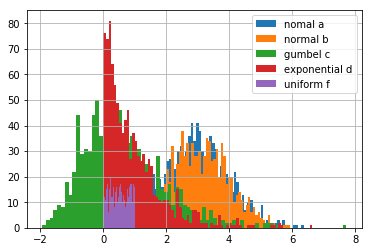

In [2]:
a = np.random.normal(loc=3, size=1000)
b = np.random.normal(loc=3, size=1000)
c = np.random.gumbel(size=1000)
d = np.random.exponential(size=1000)
f = np.random.uniform(size=1000)

hist(a, bins=80, label='nomal a')
hist(b, bins=80, label='normal b')
hist(c, bins=80, label='gumbel c')
hist(d, bins=80, label='exponential d')
hist(f, bins=80, label='uniform f')

grid()
legend()

## Mean Squared Error (MSE)

* http://mccormickml.com/2014/03/04/gradient-descent-derivation/

$$ J(\theta) = \frac{1}{N} \sum^{N}_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)}  \right)^2 $$

* $ J $ : cost function
* $ \theta $ : parameters (weights)
* N : training data의 갯수
* $ x^{(i)} $ : $ i^{th} $의 training input vector
* $ y^{(i)} $ : $ i^{th} $의 class label
* $ h_{\theta} \left( x^{(i)} \right) $ : $ \theta $를 사용하여 나온 $ i^{th} $ data에 대한 prediction


In [3]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def mean_squared_error(y, p):
    return ((y - p)**2).mean()

mean_squared_error(y, p)

0.054499995

In [4]:
metrics.mean_squared_error(y, p)

0.054499995

In [5]:
print('normal_a, normal_a\t:', mean_squared_error(a, a))
print('normal_a, normal_b\t:', mean_squared_error(a, b))
print('normal_a, gumbel  \t:', mean_squared_error(a, c))
print('normal_a, exponent\t:', mean_squared_error(a, d))
print('normal_a, uniform \t:', mean_squared_error(a, f))

normal_a, normal_a	: 0.0
normal_a, normal_b	: 1.96491394237
normal_a, gumbel  	: 8.16301713918
normal_a, exponent	: 5.89439488449
normal_a, uniform 	: 7.10319655878


## Mean Absolute Error (MAE)

$$ J(\theta) = \frac{1}{N} \sum^{N}_{i=1} \left| h_{\theta}(x^{(i)}) - y^{(i)}  \right| $$

In [6]:
def mean_abolute_error(y, p):
    return np.abs(y-p).mean()

mean_abolute_error(y, p)

0.19

In [19]:
metrics.mean_absolute_error(y, p)

0.19

In [21]:
# Scipy도 동일함
print('normal_a, normal_a\t:', mean_abolute_error(a, a))
print('normal_a, normal_b\t:', mean_abolute_error(a, b))
print('normal_a, gumbel  \t:', mean_abolute_error(a, c))
print('normal_a, exponent\t:', mean_abolute_error(a, d))
print('normal_a, uniform \t:', mean_abolute_error(a, f))

normal_a, normal_a	: 0.0
normal_a, normal_b	: 1.131790051
normal_a, gumbel  	: 2.49979612544
normal_a, exponent	: 2.13370950433
normal_a, uniform 	: 2.45740639766


## Root Mean Squared Logarithmic Error (RMSLE)

$$ \epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [8]:
def mean_squared_logatrithmic_error(y, p):
    l = lambda x: np.nan_to_num(np.log(x + 1))
    return np.sqrt(((l(p) - l(y))**2).mean())

mean_squared_logatrithmic_error(y, p)

0.16683918

In [9]:
print('normal_a, normal_a\t:', mean_squared_logatrithmic_error(a, a))
print('normal_a, normal_b\t:', mean_squared_logatrithmic_error(a, b))
print('normal_a, gumbel  \t:', mean_squared_logatrithmic_error(a, c))
print('normal_a, exponent\t:', mean_squared_logatrithmic_error(a, d))
print('normal_a, uniform \t:', mean_squared_logatrithmic_error(a, f))

normal_a, normal_a	: 0.0
normal_a, normal_b	: 0.391737472392
normal_a, gumbel  	: 1.46028356929
normal_a, exponent	: 0.901225362912
normal_a, uniform 	: 1.00583285131


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


## Binary Cross Entropy (a.k.a Logarithmic Loss)

* https://www.kaggle.com/wiki/LogarithmicLoss

$$ \text{logloss} = -\frac{1}{N} \sum^{N}_{i=1} \left( y^{(i)} \cdot \log(p_i) + (1 - y) \cdot \log(1- p_i) )  \right) $$

binary cross entropy의 경우는 binary classfication에서 주로 사용이 됩니다.

In [10]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def binary_cross_entropy(y, p):
    return -(y * np.log(p) + (1-y) * np.log(1-p)).mean()

binary_cross_entropy(y, p)

0.22590299

In [11]:
# Scipy와 동일함
metrics.log_loss(y, p)

0.22590298801660538

## Cross Entropy

* https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/

$$ H(y, \hat{y}) = - \sum_i y_i \log \hat{y}_1 $$

In [12]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def cross_entropy(y, p):
    return -(y * np.nan_to_num(np.log(p))).sum()

cross_entropy(y, p)

0.51082557

## Hinge Loss

logistic과 마찬가지로 binary classification에 사용됩니다.<br>
라이브러리 사용하면 알아서 처리되지만, 기본적으로 labels은 -1 또는 1이어야 합니다. 

$$ J(\theta) = max(0,\ 1 - y * f(x)) $$

In [13]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([-1, -1, -1, 1, -1], dtype=np.float32)

def hinge_loss(y, p):
    l = 1-(y*p)
    l[l<=0] = 0
    return l.mean()

hinge_loss(y, p)

0.98999995

In [14]:
metrics.hinge_loss(y, p)

0.98999999836087227

## KL-Divergence

$$ D_{KL}\left(p(x), q(x)\right) = \sum_{x \in X} p(x) \ln\frac{p(x)}{q(x)} $$

In [15]:
def kl_divergence(y, p):
    return np.sum(y * np.nan_to_num(np.log(y/p)), axis=0)

print('normal_a, normal_a\t:', kl_divergence(a, a))
print('normal_a, normal_b\t:', kl_divergence(a, b))
print('normal_a, gumbel  \t:', kl_divergence(a, c))
print('normal_a, exponent\t:', kl_divergence(a, d))
print('normal_a, uniform \t:', kl_divergence(a, f))

normal_a, normal_a	: 0.0
normal_a, normal_b	: 328.856300484
normal_a, gumbel  	: 2596.26188421
normal_a, exponent	: 5143.88562983
normal_a, uniform 	: 6247.6192777


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


## Cosine Proximity

* https://en.wikipedia.org/wiki/Cosine_similarity

$$ \text{similarity} = cos(\theta) = \frac{A \cdot B}{ \| A \|_2 \| B \|_2}  $$

In [16]:
def cosine_proximity(a, b):
    norm2 = lambda x: np.sqrt((x**2).sum())
    return 1 - (a * b).sum() / (norm2(a) * norm2(b))

print('normal_a, normal_a\t:', cosine_proximity(a, a))
print('normal_a, normal_b\t:', cosine_proximity(a, b))
print('normal_a, gumbel  \t:', cosine_proximity(a, c))
print('normal_a, exponent\t:', cosine_proximity(a, d))
print('normal_a, uniform \t:', cosine_proximity(a, f))

normal_a, normal_a	: 0.0
normal_a, normal_b	: 0.0992429928099
normal_a, gumbel  	: 0.588281686107
normal_a, exponent	: 0.321764215214
normal_a, uniform 	: 0.171527639554


In [17]:
print('normal_a, normal_a\t:', cosine_distantce(a, a))
print('normal_a, normal_b\t:', cosine_distantce(a, b))
print('normal_a, gumbel  \t:', cosine_distantce(a, c))
print('normal_a, exponent\t:', cosine_distantce(a, d))
print('normal_a, uniform \t:', cosine_distantce(a, f))

normal_a, normal_a	: 2.22044604925e-16
normal_a, normal_b	: 0.0992429928099
normal_a, gumbel  	: 0.588281686107
normal_a, exponent	: 0.321764215214
normal_a, uniform 	: 0.171527639554


## Poisson

* https://github.com/fchollet/keras/pull/479/commits/149d0e8d1871a7864fc2d582d6ce650512de371c

In [18]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def poisson_loss(y, p):
    return (p - y * np.log(p)).mean()

poisson_loss(y, p)

0.33216509